Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations –
Apply average and median spatial filters with 5x5 mask and observe their performance for noise suppression in term of PSNR  
Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR
Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def average_filter(image,mask):
    height,width = image.shape
    offset,weight = mask//2,mask*mask
    filter_image = np.zeros_like(image, dtype=np.float32)
    for r in range(offset,height-offset):
        for c in range(offset,width-offset):
            filter_image[r,c]=np.sum(image[r-offset:r+offset+1, c-offset:c+offset+1])/weight
    return np.uint8(filter_image)


In [16]:
def median(image,mask):
    height, width = image.shape
    offset = mask//2
    filter_image = image.copy()
    for r in range(height):
        for c in range(width):
            pixels = []
            for x in range(-offset, offset+1):
                for y in range(-offset, offset+1):
                    if(r+x>=0 and r+x<height and c+y>=0 and c+y<width):
                        pixels.append(image[r+x,c+y])
            filter_image[r,c] = sorted(pixels)[len(pixels)//2]
    return np.uint8(filter_image)
    

In [17]:
def add_salt_pipper(image,percent):
    noisy_image = image.copy()
    noisy_amount = int(image.shape[0]*image.shape[1]*(percent/100))
    row_coords = np.random.randint(0, image.shape[0],noisy_amount)
    col_coords = np.random.randint(0, image.shape[1], noisy_amount)

    for i in range(noisy_amount):
        if np.random.rand()<0.5:
            noisy_image[row_coords[i],col_coords[i]]=0
        else:
            noisy_image[row_coords[i],col_coords[i]]=255
    return noisy_image

In [18]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1-image2)**2)
    if mse==0:
        return float('inf')
    psnr = 20*np.log10(255.0) - 10*np.log10(mse)
    return round(psnr,2)

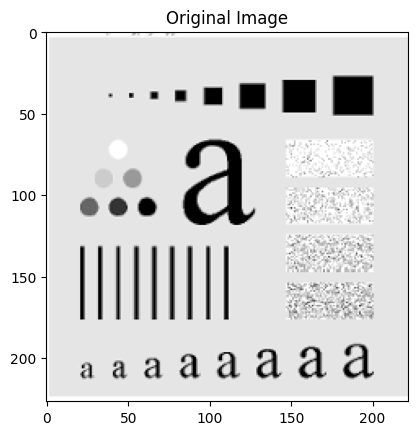

In [19]:
original_image = cv2.imread("8th.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.show()

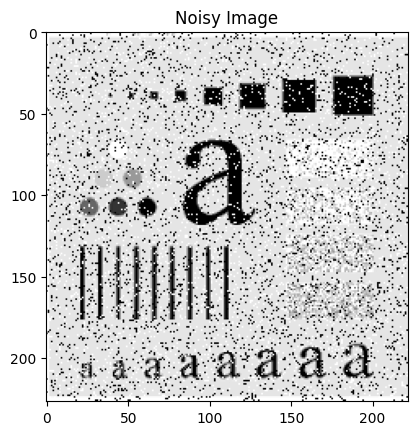

PSNR = 12.41


In [20]:
noisy_image = add_salt_pipper(original_image,15)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.show()
psnr = compute_psnr(original_image,noisy_image)
print(f"PSNR = {psnr}")

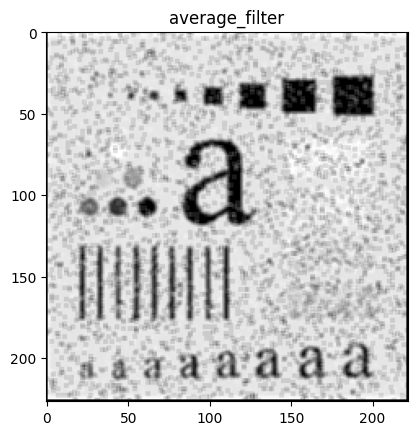

In [21]:
mask = 3
average_filter_image= average_filter(noisy_image,mask)
plt.imshow(average_filter_image,cmap='gray')
plt.title("average_filter")
plt.show()

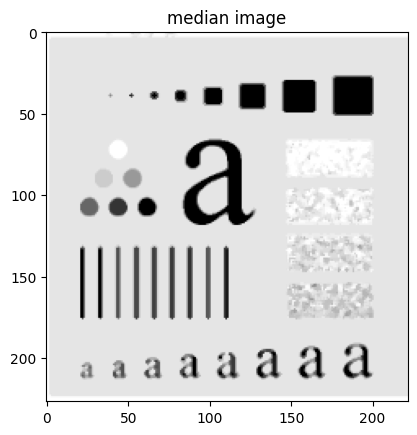

In [22]:
mask = 3
median_image = median(original_image,mask)
plt.imshow(median_image,cmap='gray')
plt.title("median image")
plt.show()

In [23]:
def harmonic(image,mask):
    filter_image = image.copy()
    height, width = image.shape
    offset, number_0f_pixel = mask//2,mask*mask
    for r in range(height):
        for c in range(width):
            pixel = 0
            for x in range(-offset,offset+1):
                for y in range(-offset, offset+1):
                    if(r+x>=0 and r+x<height and c+y>=0 and c+y<width):
                        pixel+=float(1/(image[r+x,c+y]+1e-4))
            pixel = number_0f_pixel/pixel
            filter_image[r,c]=255 if pixel>255 else pixel
    return np.uint8(filter_image)



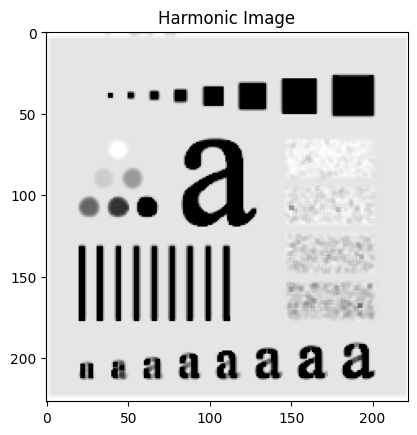

In [24]:
mask = 3
harmonic_image = harmonic(original_image,mask)
plt.imshow(harmonic_image,cmap='gray')
plt.title("Harmonic Image")
plt.show()

In [25]:
def geometry_mean(image, mask):
    filter_image = image.copy()
    height,width = image.shape
    offset = mask//2
    for r in range(height):
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset,offset+1):
                for y in range(-offset,offset+1):
                    if(r+x>=0 and r+x<height and c+y>=0 and c+y<width):
                        if(image[r+x, c+y]):
                            count+=1
                            pixel = pixel*int(image[r+x,c+y])
                        
                    
            count = 1 if count==0 else count
            filter_image[r,c]=pixel**(1/count)
    return np.uint8(filter_image)



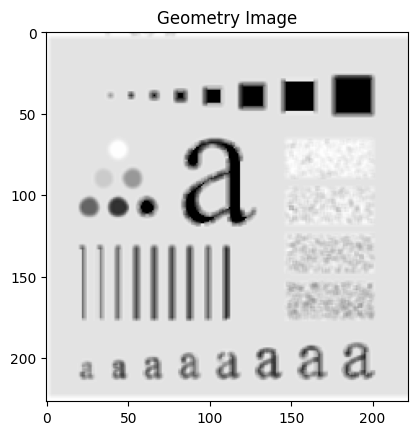

In [26]:
mask = 3
geometry_mean_image = geometry_mean(original_image, mask)
plt.imshow(geometry_mean_image, cmap='gray')
plt.title('Geometry Image')
plt.show()